<a href="https://colab.research.google.com/github/VictorV1ana/Doencas-Cardiovasculares-/blob/master/PROJETO_DOEN%C3%87AS_Victor_Viana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*) Estes
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [3]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [5]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

##Análise Inicial

#### Como está organizado o Data Set ?

* **Quantas entradas temos e quais são os tipos das variáveis ?**

In [6]:
# número de entradas e variáveis 
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}.".format(df.shape[1]))

# ver os tipos das variáveis 
df.dtypes


Entradas: 303
Variáveis: 14.


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

* **Existem valores ausentes ?**

In [7]:
#Vericar valores ausentes 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

O Data Frame não tem valores ausentes 

##Análise exploratória

* **Primeiras Entradas**

In [8]:
# plotar as primeiras entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


* **Resumo Estatístico**

O resumo estatístico apresenta algumas informações iniciais importantes, e uma possível detecção de outliers.

Além disso, nos permite analisar de forma simplificada algumas variáveis.

In [9]:
#plotar resumo estatístico
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


* A média de idade dos pacientes é de 54 anos 
 
* 75% dos pacientes tem pressão acima do considerado normal 120 mmHg. Cerca de 25% dos pacientes tem quadro de hipertenção leve - pressão arterial acima de 140 mmHg

* Maioria das amostras tem colesterol acima do normal segundo a Sociedade Brasileira de Cardiologia (valor de referência < 190mg/dl)

* Foi detectado no eletrocardiograma que cerca de 50% dos pacientes ou anormalidades de ST-T hipertrofia ou  ventricular esquerda provável ou definitiva

* Pelo menos 25% dos pacientes apresentaram angina (dor forte no peito) 

* Pelo menos 25% dos pacientes são diagnosticados com doenças cardíacas

### Outliers
Vamos tentar identificar possíveis outliers com ajuda de algumas ferramentas gráficas:


* **Histograma**

  Mostrará as distribuições das variáveis e possíveis outliers.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

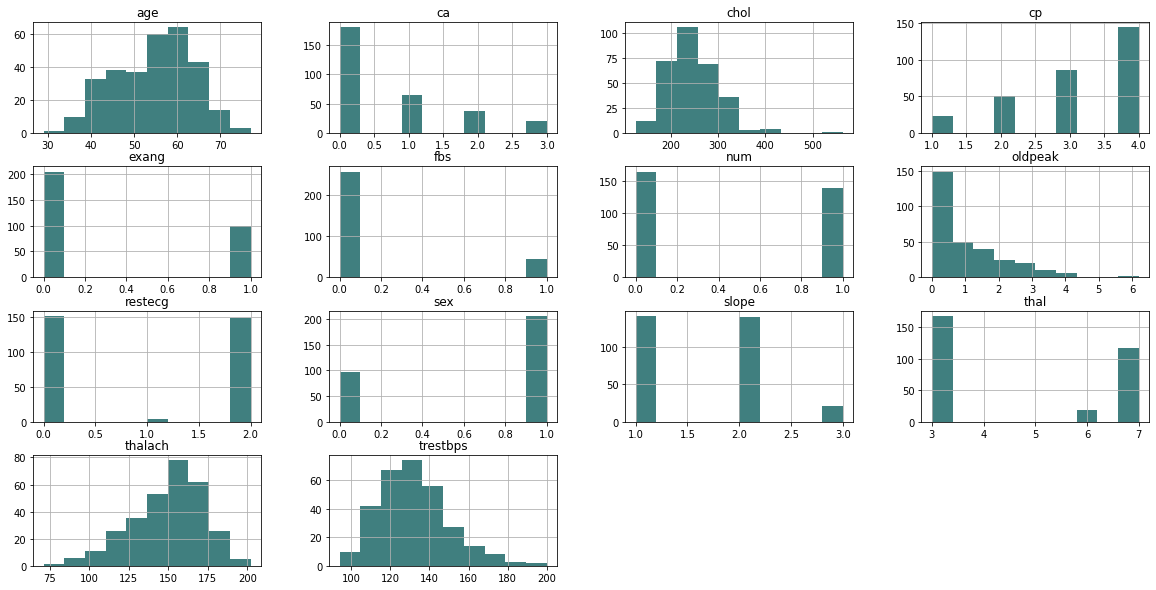

In [10]:
#plotar histograma das variáveis
df.hist(figsize=(20,10),color="#407F7F");

  Pelas distribuições as variáveis `chol` , `oldpeak` , `trestbps` , `thalach` podem ter outliers. 

* **Boxplot** 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

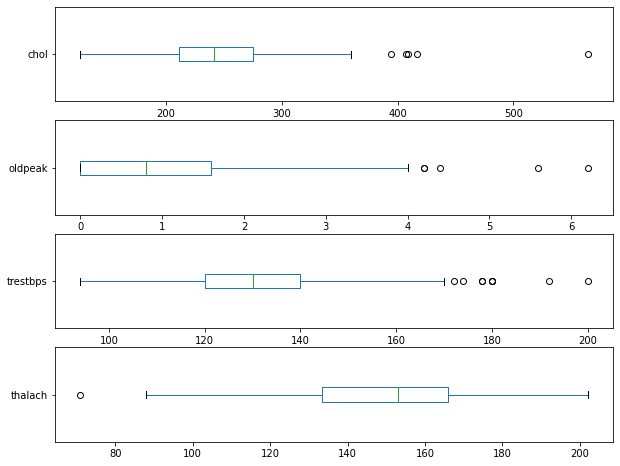

In [11]:
# box plot dos possíveis outliers 
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4,ncols=1,figsize=(10,8))

#boxplot de chol 
df.chol.plot(kind="box",vert=False,ax=ax1)
#boxplot de oldpeak
df.oldpeak.plot(kind="box",vert=False,ax=ax2)
#boxplot de trestbps
df.trestbps.plot(kind="box",vert=False, ax=ax3)
#boxplot de thalach
df.thalach.plot(kind="box",vert=False, ax=ax4)
plt.tight_layout;

**OUTILIERS :**
* `Chol` contém outliers em valores acima de 380
* `oldpeak` contém outliers em resultados acima de 4 
* `trestbps` contém outliers em valores acima de 170
* `thalach` tem um outlier

###Limpando os dados

Vamos retirar os outliers da nossa base de dados

In [12]:
#criando copia do Data Frame
df2 = df.copy()
#limpar data frame 
df2.drop(df2[df2.chol > 380].index,axis=0, inplace=True)
df2.drop(df2[df2.oldpeak > 4].index,axis=0, inplace=True)
df2.drop(df2[df.trestbps >170].index,axis=0,inplace=True)
df2.drop(df2[df2.thalach< 80].index,axis=0,inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [13]:
#verificar quantas entradas após a limpeza
df2.shape

(284, 14)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

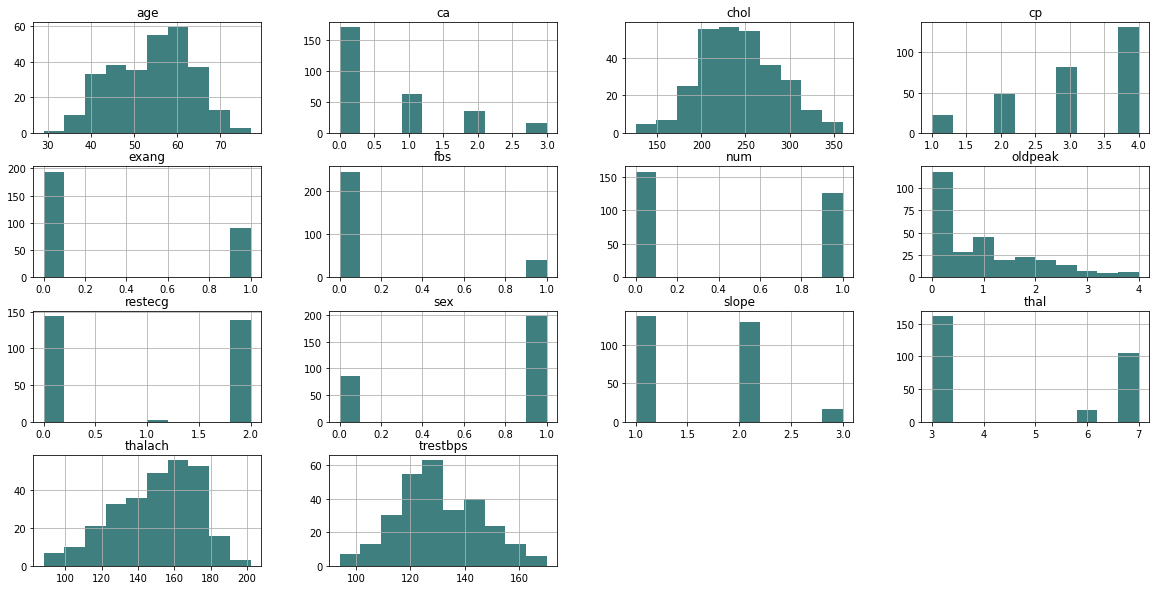

In [14]:
# plotar histograma pós limpeza
df2.hist(figsize=(20,10),color="#407F7F");

### Os pacientes são de qual sexo majoritariamente ?

In [15]:
# Calcular a quantidade de homens e mulheres  
df2.sex.value_counts()

1.0    198
0.0     86
Name: sex, dtype: int64

* São 198 homens e 86 mulheres 

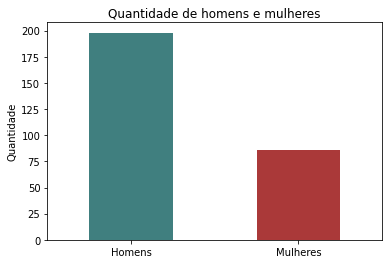

In [16]:
# plotar grafico de barras 
fig, ax = plt.subplots()
df2["sex"].value_counts().plot(kind="bar",ax=ax, color=["#407F7F","#AA3939"])
ax.set_title("Quantidade de homens e mulheres")
ax.set_ylabel("Quantidade")
plt.xticks(rotation=360)

fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Mulheres'
labels[0] = 'Homens'

ax.set_xticklabels(labels)
plt.tight_layout;


### Quantos Pacientes tem doenças cardíacas ?

In [17]:
# contar quantos pacientes tem doenças cardicas
df2.num.value_counts()



0    158
1    126
Name: num, dtype: int64

In [18]:
# porcentagem de pacientes com doenças cardíacas
df2.num.value_counts()/df2.shape[0]

0    0.556338
1    0.443662
Name: num, dtype: float64

* 55.5% dos pacientes (158) não foram diagnosticados com doenças cardíacas 
* **44.3% dos pacientes (126) tem algum tipo de doença cardíaca**

In [19]:
#Importar pocote
!pip install pywaffle -q

     |████████████████████████████████| 532kB 2.8MB/s 


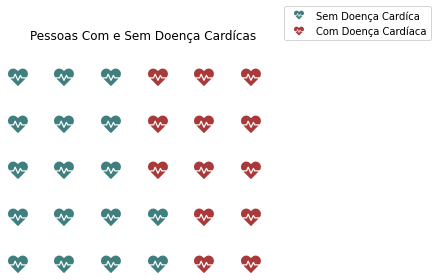

In [20]:
from pywaffle import Waffle
# colocar valores em um dicionário 
data = df2.num.value_counts().to_dict()
#plotar gráfico de Waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=6,
                title={"label":"Pessoas Com e Sem Doença Cardícas", "loc":"center"},
                colors=("#407F7F", "#AA3939"),
                values=data, icons="heartbeat",  icon_size=20,
                legend={ "labels":['Sem Doença Cardíca', "Com Doença Cardíaca"]
                        ,'loc': 'lower left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                )

###Colesterol

#### Qual é a média de colesterol dos pacientes ?

In [21]:
# calcular a média de colesterol
print("A média de colesterol dos pacientes é : {:.2f} mg/dl".format(df2.chol.mean()))

A média de colesterol dos pacientes é : 242.54 mg/dl


Esse valor é bem acima do valor considerado normal. O aumento do colesterol aumenta o risco de aterosclerose, infarto, insuficiência cardíaca e pressão alta.

####Histograma do Colesterol 



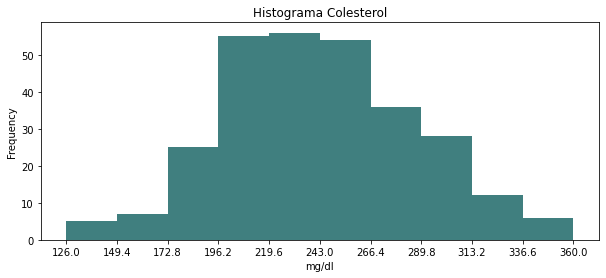

In [22]:
import numpy as np
count, bin_edges = np.histogram(df2["chol"])
# plotar o histograma
fig, ax= plt.subplots(figsize=(10,4))
df2["chol"].plot(kind="hist",ax=ax,bins=10,xticks=bin_edges,color="#407F7F")

ax.set_xlabel("mg/dl")
ax.set_title("Histograma Colesterol")
plt.tight_layout;


* A maioria dos pacientes tem colesterol sérico entre 196mg/dl e 266 mg/dl 


####Existe uma relação entre idade e colesterol ?

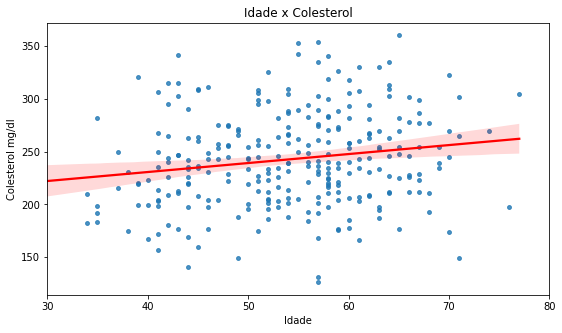

In [23]:
# plotar gráfico de dispersao com regressao
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=30,right=80)
sns.regplot("age","chol",scatter_kws={"s":15,},line_kws={"color":"red"},ax=ax,
            data=df2)
# mudando os labels 
ax.set_xlabel("Idade")
ax.set_ylabel("Colesterol mg/dl")
ax.set_title("Idade x Colesterol")

plt.tight_layout;

* Pela regressão pode-se afirmar que existe uma leve corelação entre o avanço da idade e o nível de colesterol 
* Os pacientes entre 50 a 70 anos estão em sua maioria com colesterol entre 200 mg/dl e 300 mg/dl , considerado alto pela SBC podendo causar doenças cardiovasculares graves



#### Pacientes com colesterol acima do dejesádo pela SBC
Vamos analisar os dados dos pacientes que estão com colesterol total acima do desejado.

Para isso , utilizaremos uma cópia do DataSet em que limitamos o nível de colesterol ser apenas acima do considerado desejado (190 mg/dl).  

In [24]:
# cópia do DataSet
df_clean = df2.copy()
# selcionar aqueles que apresentam colesterol acima do normal
df_clean.drop(df_clean[df_clean.chol < 190].index,axis=0,inplace=True)

#plotar resumo estatísco
df_clean.chol.describe()


count    254.000000
mean     251.086614
std       38.883432
min      192.000000
25%      220.000000
50%      245.000000
75%      275.750000
max      360.000000
Name: chol, dtype: float64

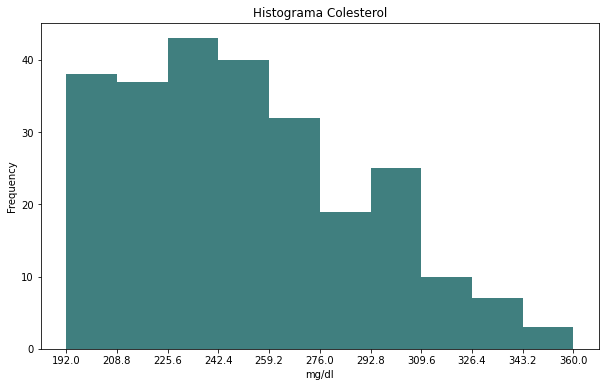

In [25]:
# plotar o histograma
fig, ax = plt.subplots(figsize=(10,6))
count, bin_edges = np.histogram(df_clean["chol"])
df_clean["chol"].plot(kind="hist",ax=ax,bins=10,xticks=bin_edges,color="#407F7F")

ax.set_xlabel("mg/dl")
ax.set_title("Histograma Colesterol")
plt.tight_layout;



Mais de 50% dos Pacientes que tem colesterol acima do considerado desejado tem o nível de colesterol acima de 240 mg/dl , nível moderadamente elevado. Nesse sentido , esses pacientes tem uma maior probabilidade de terem consequência como: AVC , Derrame e Trombose Coronário que pode levar ao Infarto do Miocárdio

### Resultado a eltrocardiograma em repouso 

In [26]:
# resultado da eltrocaria
df2.restecg.value_counts()/ df2.shape[0]

0.0    0.507042
2.0    0.485915
1.0    0.007042
Name: restecg, dtype: float64


* 50.7% teve resultado normal 
* 48.5% Hipertrofia ventricular esquerda

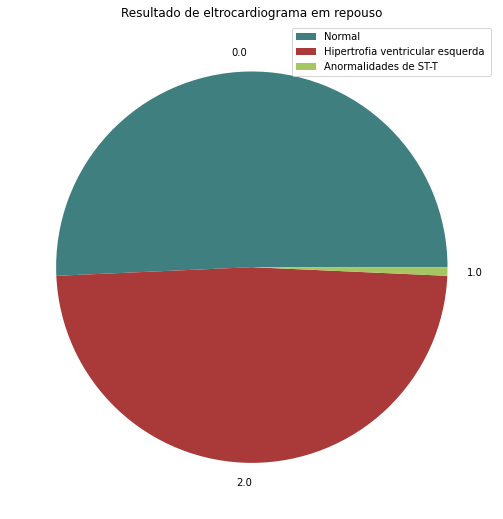

In [27]:
#@title

#plotar gráfico de pizza restecg 
fig,ax= plt.subplots(figsize=(10,9))

df2.restecg.value_counts().plot(kind="pie", ax =ax,colors=["#407F7F","#AA3939","#A5C663"])

# editar labels
ax.set_ylabel("")
ax.set_title("Resultado de eltrocardiograma em repouso")

#editar legenda
L=plt.legend(loc=1)
L.get_texts()[0].set_text('Normal')
L.get_texts()[2].set_text('Anormalidades de ST-T ')
L.get_texts()[1].set_text('Hipertrofia ventricular esquerda ')

plt.tight_layout;

Esse resultado, 48% dos pacientes ter hipertrofia ventricular esquerda é consequência de uma observação feita no início do estudo, visto que cerca de 75% dos pacientes tem pressão arterial acima do normal. Essa condição, muitas vezes, é uma adaptação à hipertensão arterial e aumenta as chances de AVC e morte súbita

### Teste Físico
 Ele mede quão bem seu corpo absorve oxigênio e o distribui aos músculos e órgãos durante períodos prolongados de exercício.
  
  O nível de aptidão cardiovascular está ligado ao risco de insuficiência cardíaca e à probabilidade de hospitalização por insuficiência cardíaca no futuro. Uma baixa aptidão cardiovascular é um forte indicador de risco de acidente vascular cerebral.

In [28]:
df2.thal.value_counts()

3.0    162
7.0    105
6.0     17
Name: thal, dtype: int64

* Normal - 162 pacientes 
* Defeito reversível - 105
* Defeito irreversível - 17

* **Gráfico do resultado**

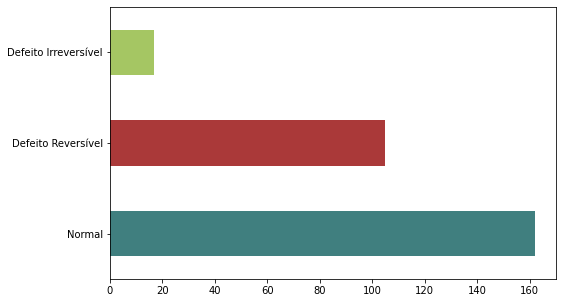

In [29]:
#plotar gráfico dos resultados
fig, ax = plt.subplots(figsize=(8,5))

df2["thal"].value_counts().plot(kind="barh", ax=ax,color=["#407F7F","#AA3939","#A5C663"])

#personalizar labels
fig.canvas.draw()

labels= [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Normal'
labels[1] = 'Defeito Reversível'
labels[2] = 'Defeito Irreversível'

ax.set_yticklabels(labels)
plt.tight_layout;

### 	Dor Torácica
Pode se assintomática ou angina que é uma dor forte na região do peito que é causada pelo estreitamento dos vasos sanguíneos que irrigam o coração com nutrientes e oxigênio.

In [30]:
df2.cp.value_counts()


4.0    131
3.0     82
2.0     49
1.0     22
Name: cp, dtype: int64

* 131 (46,1 %) são assintomáticas
* 82 (28,8 %) são dores não cardíacas
* 49 (17,2 %) são anginas atípicas 
* 22 (7,7 %) são anginas típicas

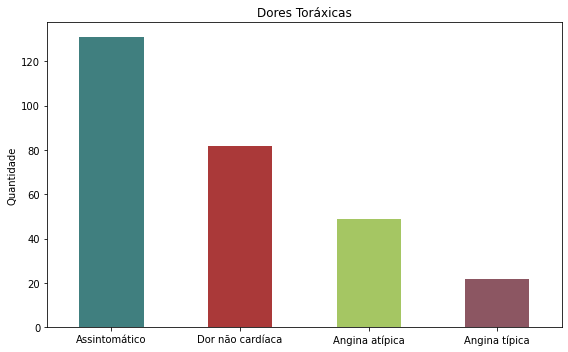

In [31]:
#plotar gráfico das dores 
fig, ax=plt.subplots(figsize=(8,5))

df2.cp.value_counts().plot(kind="bar",ax=ax, color=["#407F7F","#AA3939","#A5C663","#8C5662"])

# personalizar 
plt.xticks(rotation=360)
ax.set_title("Dores Toráxicas")
ax.set_ylabel("Quantidade")

# personalizar labels 
labels= [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Assintomático'
labels[1] = 'Dor não cardíaca'
labels[2] = 'Angina atípica'
labels[3] = 'Angina típica'

ax.set_xticklabels(labels)
plt.tight_layout()

#### Pacientes com dores anginas

In [32]:
# plotar descrição estatística do colesterol dos pacientes com dores
df2.loc[df2["cp"]<3].chol.describe()

count     71.000000
mean     241.408451
std       40.580635
min      157.000000
25%      209.000000
50%      235.000000
75%      270.000000
max      342.000000
Name: chol, dtype: float64

In [33]:
# plotar descrição estatística da pressão dos pacientes com dores
df2.loc[df2["cp"]<3].trestbps.describe()


count     71.000000
mean     130.845070
std       15.750418
min      101.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trestbps, dtype: float64

* Mais de 75% dos pacientes que tem algum tipo de dor angina tem colesterol e pressão acima do normal

### Existem correlações ?

Pelo índicie de correlação podemos saber se duas variáveis tem relação uma com a outra , variando de -1 (correlação negativa) a 1 (coorelação positiva).



* **Mapa de calor de correlação**

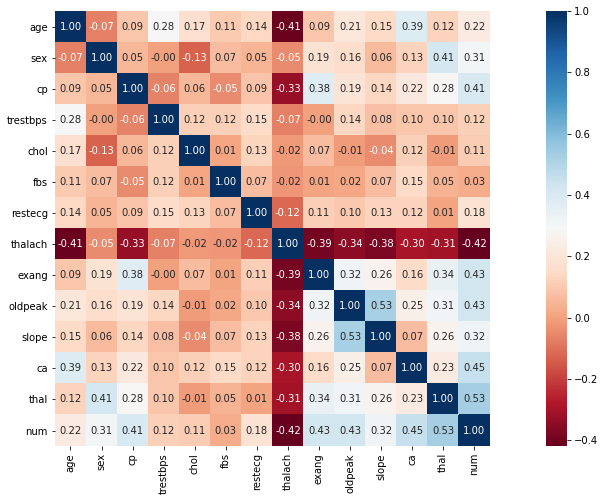

In [34]:
#plotar heatmap de correlação
corr=df2.corr()
fig , ax = plt.subplots(figsize=(20,8))
sns.heatmap(corr, cmap='RdBu', fmt = '.2f', square = True, linecolor = 'white', annot= True, ax=ax)


 A maioria das variáveis não apresenta correlação , slope e oldpeak são as variáveis que mais tem correlção - 0.53 considerada moderada.

 Vamos plotar o gráfico de dispersão com regressão delas para analisar mais específicamente.

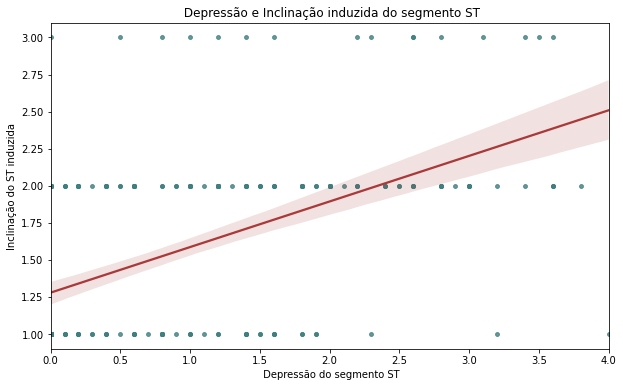

In [35]:
# gráfico de scatter de slope e oaldpeak
fig, ax= plt.subplots(figsize=(10,6))

sns.regplot("oldpeak","slope",scatter_kws={"s":15, "color":"#407F7F"},line_kws={"color":"#AA3939"},
            data=df2,ax =ax )
ax.set_title(" Depressão e Inclinação induzida do segmento ST")
ax.set_xlabel(" Depressão do segmento ST")
ax.set_ylabel("Inclinação do ST induzida")
plt.tight_layout;

##Crescimento de mortes por doenças cardiovasculares  no Brasil

In [36]:
# ver Data Frame
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


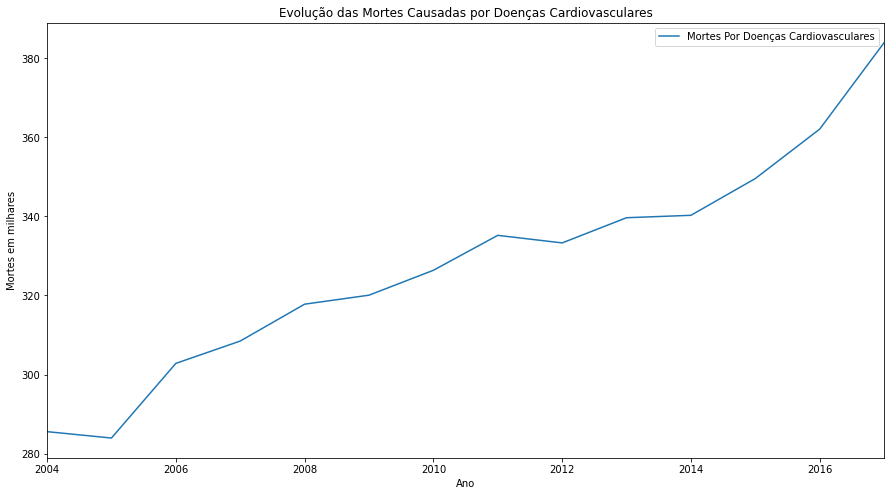

In [37]:
#plotar gráfico de crescimento de morte por doenças cardiovasculares

fig, ax= plt.subplots(figsize=(15,8))
df_brasil.plot(kind="line", x="ano",y="mortes_doencas_cardio", ax=ax,)

ax.set_title("Evolução das Mortes Causadas por Doenças Cardiovasculares" )
ax.set_xlabel("Ano")
ax.set_ylabel("Mortes em milhares")
L =plt.legend()
L.get_texts()[0].set_text('Mortes Por Doenças Cardiovasculares')
plt.tight_layout;


In [38]:
#crescimento médio do número de mortes
(383-339)/4

11.0

11.0

##**Conclusão**

Apesar de possuir outliers, o Data Set possui várias informações valiosas sobre os pacientes e as variáveis foram selecionadas de maneira ideal para análise.

Os pacientes eram majoritáriamente homens e a maioria não possuiam doenças cardíacas, em média o colesterol era de 242 mg/dl e de idade era 54 anos. 75% dos pacientes tem pressão acima do considerado normal 120 mmHg, cerca de 25%  tem quadro de hipertenção leve - pressão arterial acima de 140 mmHg


A maioria tem  colesterol entre 196mg/dl e 266 mg/dl. Essas taxas são bem acima do considerado normal pela Sociedade Brasileira de Cardiologia (190 mg/dl), indicando que esses pacientes tem uma maior chance de infarto, insuficiência cardíaca e pressão alta. Além disso, pela regressão vimos que existe uma pequena elevação das taxas quando a idade avança. Aqueles acima da taxa normal, 50% tem colesterol acima de 240 mg/dl(nível moderadamente elevado), assim tendo maior probabilidade de terem consequência como: AVC , Derreme e Trombose Coronário que pode levar ao Infarto do Miocárdio.

O resultado de alguns exames também revelaram algumas informações, no eletrocardiograma mais da metade teve resultado normal, porém 48% teve hipertrofia ventricular esquerda que é uma condição que aumenta as chances de AVC e morte súbita e  pode ser causada por pressão alta algo 75% dos pacientes tem. Somente 24,9% tem dor angina, causada pelo estreitamento das artérias e mais de 75% deles tem colesterol acima do normal. Nesse sentido, é provável que muitos dos resultados desses exames sejam consequências da pressão e do colesterol alto.

No Brasil, as mortes por doenças cardíacas aumenta em média 11.000 por ano.


